In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,date
import scipy.stats
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/Shareddrives/MSc - Shiveswarran/Processed data/Bus_trip_all_points/bus_trip_all_points_2022_02.csv'
path_bus_trips = '/content/drive/Shareddrives/MSc - Shiveswarran/Processed data/Kandy-Digana Feb 2022/bus_trips.csv'

In [ ]:
data = pd.read_csv(path)
bus_trips = pd.read_csv(path_bus_trips)

In [ ]:
bus_trips

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,duration_in_mins,day_of_week,hour_of_day
0,1.0,116,2022-02-01,BT02,BT01,2,08:19:57,09:12:03,0:52:06,52.100000,1,8
1,2.0,116,2022-02-01,BT01,BT02,1,09:21:03,10:14:40,0:53:37,53.616667,1,9
2,3.0,116,2022-02-01,BT02,BT01,2,12:10:34,13:07:09,0:56:35,56.583333,1,12
3,4.0,116,2022-02-01,BT01,BT02,1,13:19:54,14:19:26,0:59:32,59.533333,1,13
4,5.0,116,2022-02-01,BT02,BT01,2,15:40:15,16:35:36,0:55:21,55.350000,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2243.0,1719,2022-02-25,BT01,BT02,1,09:42:39,10:34:55,0:52:16,52.266667,4,9
2243,2244.0,1719,2022-02-25,BT02,BT01,2,12:20:38,13:15:08,0:54:30,54.500000,4,12
2244,2245.0,1719,2022-02-25,BT01,BT02,1,13:41:27,14:37:58,0:56:31,56.516667,4,13
2245,2246.0,1719,2022-02-25,BT02,BT01,2,16:00:09,16:47:25,0:47:16,47.266667,4,16


In [ ]:
df= data

In [ ]:
df

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
0,820525296,116,2022-02-01 09:21:03,7.293112,80.636000,8.63931,2022-02-01,09:21:03,POINT (184793.51972188835 232324.95706872706),BT01,2.0,1
1,820525301,116,2022-02-01 09:21:18,7.293102,80.636820,10.25920,2022-02-01,09:21:18,POINT (184884.07085050386 232323.8241002839),NaN,2.0,1
2,820525305,116,2022-02-01 09:21:33,7.293055,80.637515,7.01944,2022-02-01,09:21:33,POINT (184960.79680092313 232318.64808713354),NaN,2.0,1
3,820525307,116,2022-02-01 09:21:48,7.292823,80.637685,4.85961,2022-02-01,09:21:48,POINT (184979.55976880985 232293.02055796303),NaN,2.0,1
4,820538763,116,2022-02-01 09:22:03,7.292185,80.637572,11.33910,2022-02-01,09:22:03,POINT (184967.0287503877 232222.4395019515),NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
794602,898913829,1719,2022-02-25 16:47:18,7.291338,80.636033,7.55940,2022-02-25,16:47:18,POINT (184797.14864899832 232128.8601075894),NaN,2246.0,2
794603,898913828,1719,2022-02-25 16:47:20,7.291365,80.635967,7.01944,2022-02-25,16:47:20,POINT (184789.78481759044 232131.81487262985),NaN,2246.0,2
794604,898913827,1719,2022-02-25 16:47:22,7.291395,80.635918,5.39957,2022-02-25,16:47:22,POINT (184784.45274323068 232135.13394971617),NaN,2246.0,2
794605,898913911,1719,2022-02-25 16:47:24,7.291413,80.635868,5.39957,2022-02-25,16:47:24,POINT (184778.93257382434 232137.15926928265),NaN,2246.0,2


In [ ]:
df['bus_stop'] = df['bus_stop'].fillna(0)

In [ ]:
df

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
0,820525296,116,2022-02-01 09:21:03,7.293112,80.636000,8.63931,2022-02-01,09:21:03,POINT (184793.51972188835 232324.95706872706),BT01,2.0,1
1,820525301,116,2022-02-01 09:21:18,7.293102,80.636820,10.25920,2022-02-01,09:21:18,POINT (184884.07085050386 232323.8241002839),0,2.0,1
2,820525305,116,2022-02-01 09:21:33,7.293055,80.637515,7.01944,2022-02-01,09:21:33,POINT (184960.79680092313 232318.64808713354),0,2.0,1
3,820525307,116,2022-02-01 09:21:48,7.292823,80.637685,4.85961,2022-02-01,09:21:48,POINT (184979.55976880985 232293.02055796303),0,2.0,1
4,820538763,116,2022-02-01 09:22:03,7.292185,80.637572,11.33910,2022-02-01,09:22:03,POINT (184967.0287503877 232222.4395019515),0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
794602,898913829,1719,2022-02-25 16:47:18,7.291338,80.636033,7.55940,2022-02-25,16:47:18,POINT (184797.14864899832 232128.8601075894),0,2246.0,2
794603,898913828,1719,2022-02-25 16:47:20,7.291365,80.635967,7.01944,2022-02-25,16:47:20,POINT (184789.78481759044 232131.81487262985),0,2246.0,2
794604,898913827,1719,2022-02-25 16:47:22,7.291395,80.635918,5.39957,2022-02-25,16:47:22,POINT (184784.45274323068 232135.13394971617),0,2246.0,2
794605,898913911,1719,2022-02-25 16:47:24,7.291413,80.635868,5.39957,2022-02-25,16:47:24,POINT (184778.93257382434 232137.15926928265),0,2246.0,2


In [ ]:
columns = ['trip_id','records_total_count','zero_speed_counts',' SIT_percent']
non_stop_idle_time = pd.DataFrame(columns=columns)

In [ ]:
df.reset_index(drop = True, inplace = True)

for name, group in df.groupby('trip_id'):
  values = []
  trip_id = np.unique(group['trip_id'].values)[0]
  records_total_count = group.size
  zero_speed_counts = len(group[(group['bus_stop']== 0) & (group['speed']==0)])

  SIT_percent = (zero_speed_counts/records_total_count)*100

  values.extend([trip_id,records_total_count,zero_speed_counts,SIT_percent])
  non_stop_idle_time = non_stop_idle_time.append(dict(zip(columns,values)),True)
  

  

In [ ]:
non_stop_idle_time

,trip_id,records_total_count,zero_speed_counts,SIT_percent
0,1.0,2568.0,28.0,1.090343
1,2.0,2664.0,21.0,0.788288
2,3.0,2856.0,28.0,0.980392
3,4.0,2964.0,33.0,1.113360
4,5.0,2736.0,32.0,1.169591
...,...,...,...,...
2242,2243.0,19128.0,24.0,0.125471
2243,2244.0,19368.0,62.0,0.320116
2244,2245.0,20664.0,23.0,0.111305
2245,2246.0,18516.0,37.0,0.199827


In [ ]:
df = pd.merge(left = bus_trips, right  = non_stop_idle_time,how = 'outer',left_on ='trip_id', right_on= 'trip_id')

In [ ]:
df

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,duration_in_mins,day_of_week,hour_of_day,records_total_count,zero_speed_counts,SIT_percent
0,1.0,116,2022-02-01,BT02,BT01,2,08:19:57,09:12:03,0:52:06,52.100000,1,8,2568.0,28.0,1.090343
1,2.0,116,2022-02-01,BT01,BT02,1,09:21:03,10:14:40,0:53:37,53.616667,1,9,2664.0,21.0,0.788288
2,3.0,116,2022-02-01,BT02,BT01,2,12:10:34,13:07:09,0:56:35,56.583333,1,12,2856.0,28.0,0.980392
3,4.0,116,2022-02-01,BT01,BT02,1,13:19:54,14:19:26,0:59:32,59.533333,1,13,2964.0,33.0,1.113360
4,5.0,116,2022-02-01,BT02,BT01,2,15:40:15,16:35:36,0:55:21,55.350000,1,15,2736.0,32.0,1.169591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2243.0,1719,2022-02-25,BT01,BT02,1,09:42:39,10:34:55,0:52:16,52.266667,4,9,19128.0,24.0,0.125471
2243,2244.0,1719,2022-02-25,BT02,BT01,2,12:20:38,13:15:08,0:54:30,54.500000,4,12,19368.0,62.0,0.320116
2244,2245.0,1719,2022-02-25,BT01,BT02,1,13:41:27,14:37:58,0:56:31,56.516667,4,13,20664.0,23.0,0.111305
2245,2246.0,1719,2022-02-25,BT02,BT01,2,16:00:09,16:47:25,0:47:16,47.266667,4,16,18516.0,37.0,0.199827


In [ ]:
df['zero_speed_time'] = df['zero_speed_counts']/5

In [ ]:
df['NBIT_percent'] = (df['zero_speed_time']/df['duration_in_mins'])*100

In [ ]:
df

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,duration_in_mins,day_of_week,hour_of_day,records_total_count,zero_speed_counts,SIT_percent,zero_speed_time,NBIT_percent
0,1.0,116,2022-02-01,BT02,BT01,2,08:19:57,09:12:03,0:52:06,52.100000,1,8,2568.0,28.0,1.090343,4.666667,8.957134
1,2.0,116,2022-02-01,BT01,BT02,1,09:21:03,10:14:40,0:53:37,53.616667,1,9,2664.0,21.0,0.788288,3.500000,6.527821
2,3.0,116,2022-02-01,BT02,BT01,2,12:10:34,13:07:09,0:56:35,56.583333,1,12,2856.0,28.0,0.980392,4.666667,8.247423
3,4.0,116,2022-02-01,BT01,BT02,1,13:19:54,14:19:26,0:59:32,59.533333,1,13,2964.0,33.0,1.113360,5.500000,9.238522
4,5.0,116,2022-02-01,BT02,BT01,2,15:40:15,16:35:36,0:55:21,55.350000,1,15,2736.0,32.0,1.169591,5.333333,9.635652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2243.0,1719,2022-02-25,BT01,BT02,1,09:42:39,10:34:55,0:52:16,52.266667,4,9,19128.0,24.0,0.125471,4.000000,7.653061
2243,2244.0,1719,2022-02-25,BT02,BT01,2,12:20:38,13:15:08,0:54:30,54.500000,4,12,19368.0,62.0,0.320116,10.333333,18.960245
2244,2245.0,1719,2022-02-25,BT01,BT02,1,13:41:27,14:37:58,0:56:31,56.516667,4,13,20664.0,23.0,0.111305,3.833333,6.782660
2245,2246.0,1719,2022-02-25,BT02,BT01,2,16:00:09,16:47:25,0:47:16,47.266667,4,16,18516.0,37.0,0.199827,6.166667,13.046544


In [ ]:
df = df.drop(df[df['NBIT_percent']>30].index )

In [ ]:
df['direction'] = df['direction'].replace(1,'KAN-DIG') 
df['direction'] = df['direction'].replace(2,'DIG-KAN') 

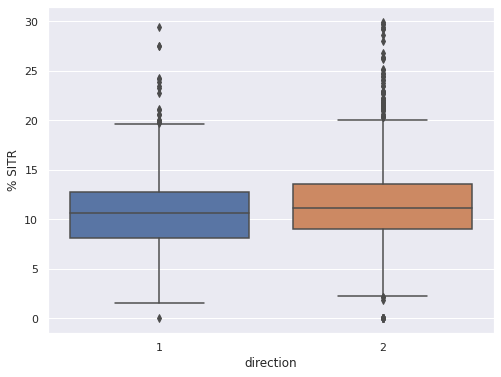

In [ ]:
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='direction', y='NBIT_percent', data =  df)

plt.ylabel("% SITR")
plt.savefig('boc SITR')
plt.show() 

In [ ]:
def condition(x):
  if x < 15:
    return 0
  elif x < 30:
    return 0.25
  elif x < 45:
    return 0.5
  else:
    return 0.75



In [ ]:
df['min'] = list(map(lambda  x: x.minute, (pd.to_datetime(df['start_time']))))

In [ ]:
df['t'] = df['min'].apply(condition)
df['time_of_day'] = df['hour_of_day'] + df['t']

In [ ]:
df = df.drop(['min','t','hour_of_day'], axis = 1)

In [ ]:
df = df.loc[(df['time_of_day']>6) & (df['time_of_day']<19)]

In [ ]:
df

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,duration_in_mins,day_of_week,records_total_count,zero_speed_counts,SIT_percent,zero_speed_time,NBIT_percent,time_of_day
0,1.0,116,2022-02-01,BT02,BT01,2,08:19:57,09:12:03,0:52:06,52.100000,1,2568.0,28.0,1.090343,4.666667,8.957134,8.25
1,2.0,116,2022-02-01,BT01,BT02,1,09:21:03,10:14:40,0:53:37,53.616667,1,2664.0,21.0,0.788288,3.500000,6.527821,9.25
2,3.0,116,2022-02-01,BT02,BT01,2,12:10:34,13:07:09,0:56:35,56.583333,1,2856.0,28.0,0.980392,4.666667,8.247423,12.00
3,4.0,116,2022-02-01,BT01,BT02,1,13:19:54,14:19:26,0:59:32,59.533333,1,2964.0,33.0,1.113360,5.500000,9.238522,13.25
4,5.0,116,2022-02-01,BT02,BT01,2,15:40:15,16:35:36,0:55:21,55.350000,1,2736.0,32.0,1.169591,5.333333,9.635652,15.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2243.0,1719,2022-02-25,BT01,BT02,1,09:42:39,10:34:55,0:52:16,52.266667,4,19128.0,24.0,0.125471,4.000000,7.653061,9.50
2243,2244.0,1719,2022-02-25,BT02,BT01,2,12:20:38,13:15:08,0:54:30,54.500000,4,19368.0,62.0,0.320116,10.333333,18.960245,12.25
2244,2245.0,1719,2022-02-25,BT01,BT02,1,13:41:27,14:37:58,0:56:31,56.516667,4,20664.0,23.0,0.111305,3.833333,6.782660,13.50
2245,2246.0,1719,2022-02-25,BT02,BT01,2,16:00:09,16:47:25,0:47:16,47.266667,4,18516.0,37.0,0.199827,6.166667,13.046544,16.00


In [ ]:
df['zero_speed_time'].mean()

6.235068980863373

In [ ]:
df['zero_speed_time'].std()

5.585671967518435

In [ ]:
df['NBIT_percent'].mean()

11.350644563356557

In [ ]:
df['NBIT_percent'].std()

5.205100851472776

In [ ]:
def timegraph(data,figname):
  data = data.loc[(data['time_of_day']>6) & (data['time_of_day']<19)]


  sns.set_theme(style="darkgrid")
  h = sns.lineplot(data=data, x='time_of_day', y='value', hue= 'time',markers = True, style = 'time')
  h = h.set_xticks(range(6,20))
  plt.xlabel("Time of Day")
  plt.ylabel("Time (minutes)")
  plt.savefig(figname)
  plt.show()  

In [ ]:
df2 = df[df['direction']==2]

In [ ]:
df_melted = pd.melt(df2, id_vars =['time_of_day'], value_vars =['duration_in_mins', 'zero_speed_time'])

In [ ]:
df_melted

,time_of_day,variable,value
0,8.25,duration_in_mins,52.100000
1,12.00,duration_in_mins,56.583333
2,15.50,duration_in_mins,55.350000
3,8.00,duration_in_mins,51.250000
4,11.50,duration_in_mins,54.416667
...,...,...,...
2051,13.00,zero_speed_time,8.333333
2052,17.00,zero_speed_time,5.666667
2053,8.50,zero_speed_time,7.333333
2054,12.25,zero_speed_time,10.333333


In [ ]:
df_melted.rename(columns = {'variable':'time'}, inplace = True)

df_melted = df_melted.replace(['zero_speed_time','duration_in_mins'],['Segment Idle time', 'Total Travel time'])

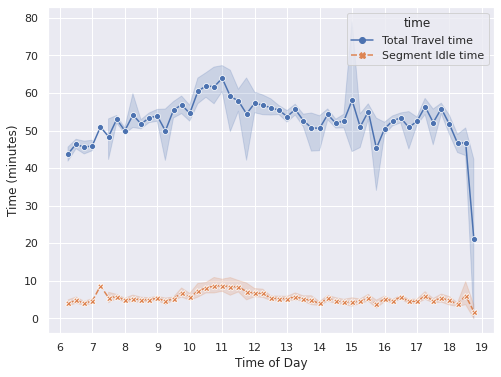

In [ ]:
timegraph(df_melted,'site.png')

In [ ]:
def condition(x):
  if x < 15:
    return 0
  elif x < 30:
    return 0.25
  elif x < 45:
    return 0.5
  else:
    return 0.75